# lecture 14 woowaway
The Plan:
1. set up imports
2. load the data
3. split into training and testting data
4. define the different hyperparameter values
5. loop over combinations of hyperparemeters, train models, and evaluate accuracy

In [18]:
#set up imports
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd



In [3]:
# load the data
digits = load_digits()
X = digits.data
y = digits.target

print(X.shape), y

(1797, 64)


(None, array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)))

In [4]:
# do the test train split (75% of the data for training)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

y_train

array([5, 2, 0, ..., 2, 7, 1], shape=(1347,))

In [14]:
# define hyperparameter values to test


max_samples = [0.01, 0.25, 0.5, 0.75, 0.99, 1]
max_features = [0.01, 0.25, 0.5, 0.75, 0.99, 1]



In [21]:

results = []
for max_s in max_samples:
    for max_f in max_features:
        # print(max_s, max_f)
        # create a random forest classifier
        rf_clf = RandomForestClassifier(max_samples=max_s, max_features=max_f,random_state=42)
        # fit the model
        rf_clf.fit(X_train,y_train)


        # make predictions
        y_preds = rf_clf.predict(X_test)

        # evaluate accuracy
        acc = accuracy_score(y_true=y_test, y_pred=y_preds)

        # print result
        results.append({
            'max features': max_f,
            'max samples': max_s,
            'accuracy': acc
        })
        
results_df = pd.DataFrame(results)

print(results_df)


    max features  max samples  accuracy
0           0.01         0.01  0.791111
1           0.25         0.01  0.840000
2           0.50         0.01  0.835556
3           0.75         0.01  0.831111
4           0.99         0.01  0.828889
5           1.00         0.01  0.791111
6           0.01         0.25  0.953333
7           0.25         0.25  0.962222
8           0.50         0.25  0.964444
9           0.75         0.25  0.957778
10          0.99         0.25  0.960000
11          1.00         0.25  0.953333
12          0.01         0.50  0.962222
13          0.25         0.50  0.975556
14          0.50         0.50  0.968889
15          0.75         0.50  0.968889
16          0.99         0.50  0.964444
17          1.00         0.50  0.962222
18          0.01         0.75  0.968889
19          0.25         0.75  0.977778
20          0.50         0.75  0.975556
21          0.75         0.75  0.966667
22          0.99         0.75  0.951111
23          1.00         0.75  0.968889


<Axes: xlabel='accuracy'>

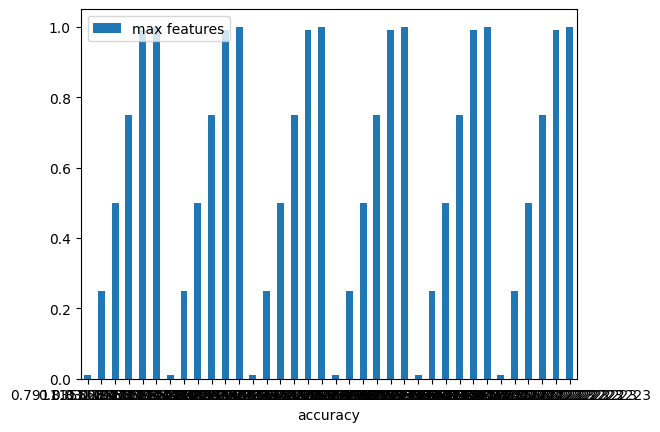

In [ ]:
results_df.plot.bar(x='accuracy', y='max features', rot=0)

In [43]:
n_estimators = [1, 20, 40, 60, 80, 100, 1000]
max_depth = [2, 4, 6, 8, 10, None]

In [46]:
ndepth_results = []
for n in n_estimators:
    for max_d in max_depth:
        # print(max_s, max_f)
        # create a random forest classifier
        rf_clf = RandomForestClassifier(n_estimators=n, max_depth=max_d,random_state=42)
        # fit the model
        rf_clf.fit(X_train,y_train)


        # make predictions
        y_preds = rf_clf.predict(X_test)

        # evaluate accuracy
        acc = accuracy_score(y_true=y_test, y_pred=y_preds)

        # print result
        ndepth_results.append({
            'max depth': max_d,
            'n estimators': n,
            'accuracy': acc
        })
        
ndepth_results_df = pd.DataFrame(ndepth_results)

print(ndepth_results_df)

    max depth  n estimators  accuracy
0         2.0             1  0.375556
1         4.0             1  0.584444
2         6.0             1  0.708889
3         8.0             1  0.780000
4        10.0             1  0.802222
5         NaN             1  0.793333
6         2.0            20  0.795556
7         4.0            20  0.928889
8         6.0            20  0.962222
9         8.0            20  0.966667
10       10.0            20  0.968889
11        NaN            20  0.971111
12        2.0            40  0.835556
13        4.0            40  0.935556
14        6.0            40  0.957778
15        8.0            40  0.973333
16       10.0            40  0.975556
17        NaN            40  0.971111
18        2.0            60  0.848889
19        4.0            60  0.937778
20        6.0            60  0.960000
21        8.0            60  0.968889
22       10.0            60  0.977778
23        NaN            60  0.971111
24        2.0            80  0.844444
25        4.

<Axes: xlabel='n estimators', ylabel='accuracy'>

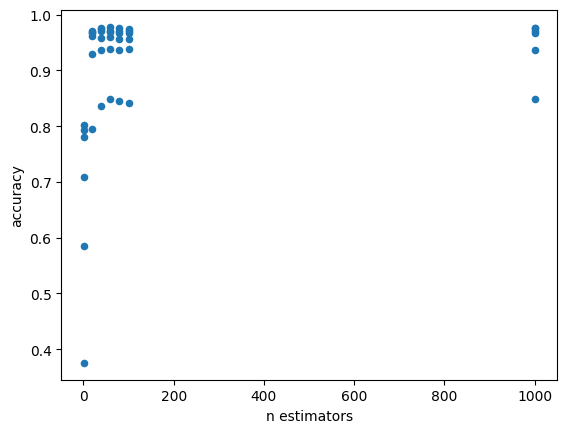

In [47]:
ndepth_results_df.plot.scatter(x='n estimators', y='accuracy', rot=0)